In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as sp
from scipy.stats import chi2
from scipy.integrate import quad
import scipy.optimize as opt

In [11]:
data = pd.read_csv('../data/clms.txt', sep='\t\n', squeeze=True, header=None, names=['Health Claim Amounts'], engine='python')

In [12]:
mean = data.mean()
median = data.median()
maximum = data.max()
minimum = data.min()
std = data.std()

print('Mean: {}\nMedian: {}\nMaximum: {}\nMinimum: {}\nStandard Deviation: {}'.format(mean, median, maximum, minimum, std))

Mean: 720.2779753272415
Median: 172.21
Maximum: 227967.25
Minimum: 0.01
Standard Deviation: 3972.8508241194368


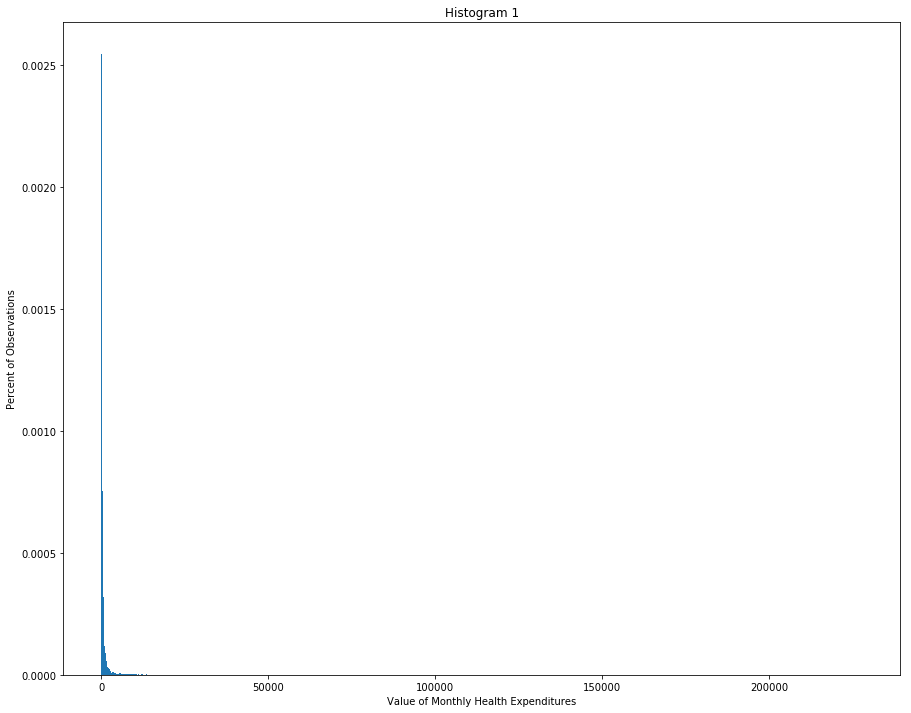

In [13]:
plt.subplots(figsize=(15, 12))
count, bins, ignored = plt.hist(data, 1000, normed=True)
plt.ylabel('Percent of Observations')
plt.xlabel('Value of Monthly Health Expenditures')
plt.title('Histogram 1')
plt.show()

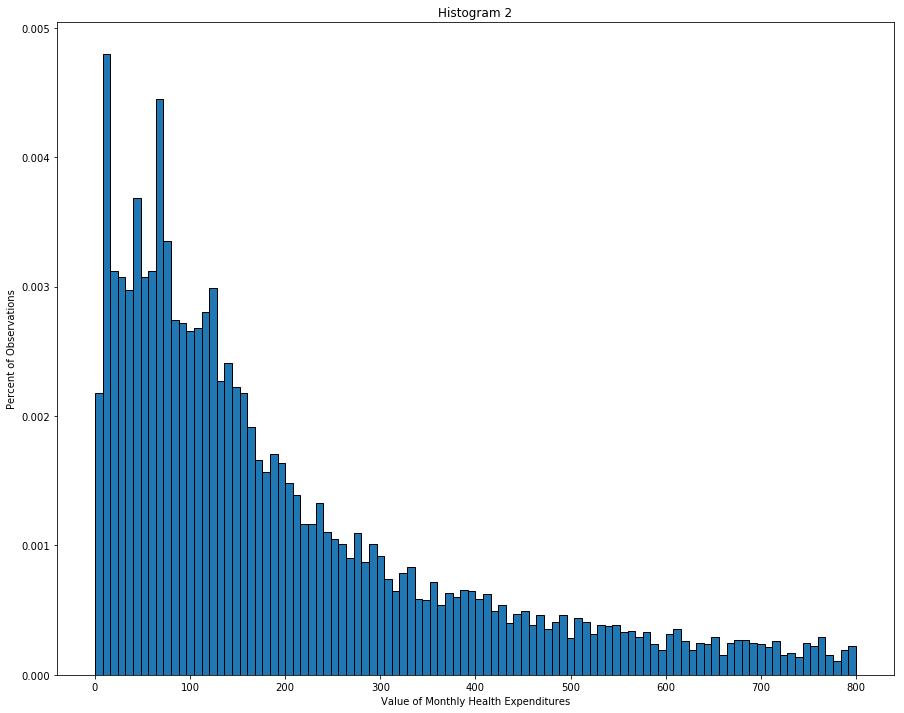

In [14]:
plt.subplots(figsize=(15, 12))
count, bins, ignored = plt.hist(data, 100, range=((minimum, 800)), weights=[1/(8*data.size)]*data.size, edgecolor='black')
plt.ylabel('Percent of Observations')
plt.xlabel('Value of Monthly Health Expenditures')
plt.title('Histogram 2')
plt.show()

The second histogram is more informative because it is scaled better. The first histogram is hard to interpret because of a few outliers.

In [15]:
def GA_pdf(xvals, alpha, beta):
    pdf_vals = ((xvals ** (alpha - 1)) * np.exp(-xvals / beta)) / ((beta ** alpha) * sp.gamma(alpha))
    pdf_vals[pdf_vals == 0] = 1e-10
    return pdf_vals

In [16]:
def log_lik_GA(xvals, alpha, beta):
    pdf_vals = GA_pdf(xvals, alpha, beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

In [17]:
def crit_GA(params, xvals):
    alpha, beta = params
    log_lik_val = log_lik_GA(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [18]:
beta_init_GA = std ** 2 / mean
alpha_init_GA = mean / beta_init_GA
params_init_GA = np.array([alpha_init_GA, beta_init_GA])
results_GA = opt.minimize(crit_GA, params_init_GA, args=(data), bounds=((0, None), (0, None)))
alpha_MLE_GA, beta_MLE_GA = results_GA.x
print('alpha_MLE_GA =', alpha_MLE_GA, 'beta_MLE_GA =', beta_MLE_GA)
print('Maximum log likelihood: {}'.format(log_lik_GA(data, alpha_MLE_GA, beta_MLE_GA)))

alpha_MLE_GA = 0.221750855052 beta_MLE_GA = 21913.1282773
Maximum log likelihood: -82076.64049650544


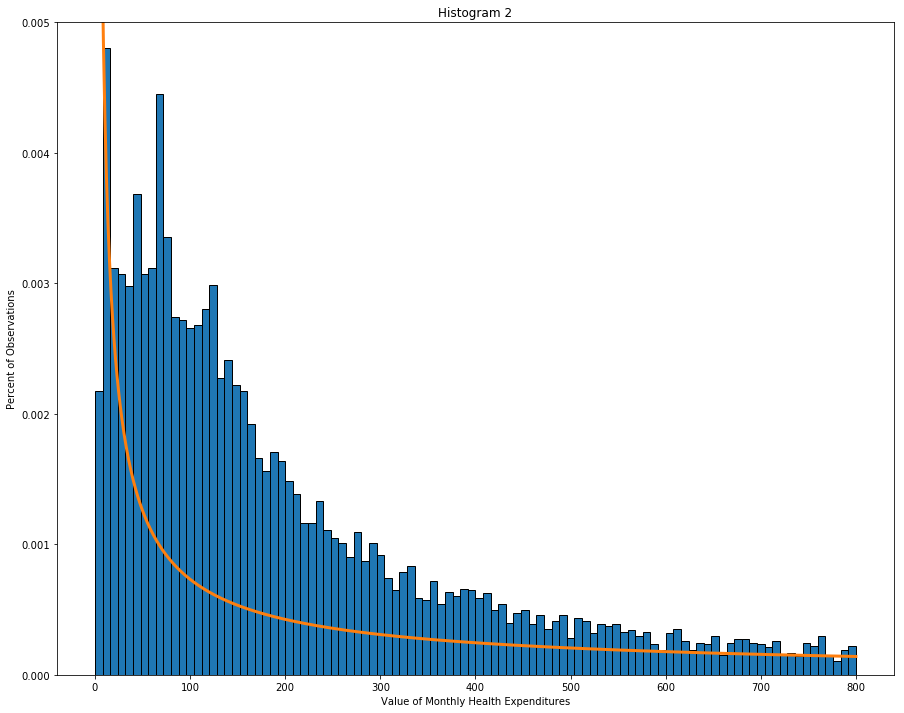

In [19]:
dist_pts = np.linspace(minimum, 800, 1000)
plt.subplots(figsize=(15, 12))
count, bins, ignored = plt.hist(data, 100, range=((minimum, 800)), weights=[1/(8*data.size)]*data.size, edgecolor='black')
plt.plot(dist_pts, GA_pdf(dist_pts, alpha_MLE_GA, beta_MLE_GA), lw=3)
plt.ylim((0, 0.005))
plt.ylabel('Percent of Observations')
plt.xlabel('Value of Monthly Health Expenditures')
plt.title('Histogram 2')
plt.show()

In [20]:
def GG_pdf(xvals, alpha, beta, m):
    pdf_vals = (m * (xvals ** (alpha - 1)) * np.exp(-(xvals / beta) ** m)) / ((beta ** alpha) * sp.gamma(alpha / m))
    pdf_vals[pdf_vals == 0] = 1e-10
    return pdf_vals

In [21]:
def log_lik_GG(xvals, alpha, beta, m):
    pdf_vals = GG_pdf(xvals, alpha, beta, m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

In [22]:
def crit_GG(params, xvals):
    alpha, beta, m = params
    log_lik_val = log_lik_GG(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [23]:
beta_init_GG = beta_MLE_GA
alpha_init_GG = alpha_MLE_GA
m_init_GG = 1
params_init_GG = np.array([alpha_init_GG, beta_init_GG, m_init_GG])
results_GG = opt.minimize(crit_GG, params_init_GG, args=(data), bounds=((0, None), (0, None), (0, None)))
alpha_MLE_GG, beta_MLE_GG, m_MLE_GG = results_GG.x
print('alpha_MLE_GG =', alpha_MLE_GG, 'beta_MLE_GG =', beta_MLE_GG, 'm_MLE_GG =', m_MLE_GG)
print('Maximum log likelihood: {}'.format(log_lik_GG(data, alpha_MLE_GG, beta_MLE_GG, m_MLE_GG)))

alpha_MLE_GG = 0.221749587628 beta_MLE_GG = 21913.1280958 m_MLE_GG = 0.99764652721
Maximum log likelihood: -82076.63530702936


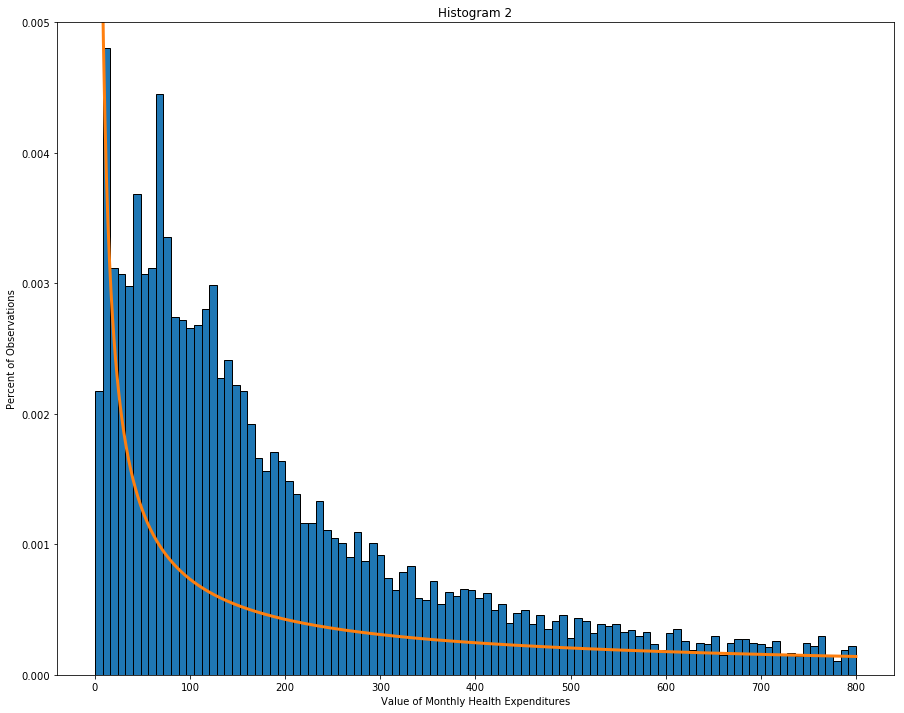

In [24]:
dist_pts = np.linspace(minimum, 800, 1000)
plt.subplots(figsize=(15, 12))
count, bins, ignored = plt.hist(data, 100, range=((minimum, 800)), weights=[1/(8*data.size)]*data.size, edgecolor='black')
plt.plot(dist_pts, GG_pdf(dist_pts, alpha_MLE_GG, beta_MLE_GG, m_MLE_GG), lw=3)
plt.ylim((0, 0.005))
plt.ylabel('Percent of Observations')
plt.xlabel('Value of Monthly Health Expenditures')
plt.title('Histogram 2')
plt.show()

In [25]:
def GB2_pdf(xvals, a, b, p, q):
    pdf_vals = (a * (xvals ** ((a * p) - 1))) / ((b ** (a * p)) * sp.beta(p, q) * ((1 + (xvals / b) ** a) ** (p + q)))
    pdf_vals[pdf_vals == 0] = 1e-10
    return pdf_vals

In [26]:
def log_lik_GB2(xvals, a, b, p, q):
    pdf_vals = GB2_pdf(xvals, a, b, p, q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

In [27]:
def crit_GB2(params, xvals):
    a, b, p, q = params
    log_lik_val = log_lik_GB2(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [28]:
q_init_GB2 = 10000
b_init_GB2 = q_init_GB2 ** (1 / m_MLE_GG) * beta_MLE_GG
a_init_GB2 = m_MLE_GG
p_init_GB2 = alpha_MLE_GG / m_MLE_GG
params_init_GB2 = np.array([a_init_GB2, b_init_GB2, p_init_GB2, q_init_GB2])
results_GB2 = opt.minimize(crit_GB2, params_init_GB2, args=(data), bounds=((0, None), (0, None), (0, None), (0, None)))
a_MLE_GB2, b_MLE_GB2, p_MLE_GB2, q_MLE_GB2 = results_GB2.x
print('a_MLE_GB2 =', a_MLE_GB2, 'b_MLE_GB2 =', b_MLE_GB2, 'p_MLE_GB2 =', p_MLE_GB2, 'q_MLE_GB2 =', q_MLE_GB2)
print('Maximum log likelihood: {}'.format(log_lik_GB2(data, a_MLE_GB2, b_MLE_GB2, p_MLE_GB2, q_MLE_GB2)))

a_MLE_GB2 = 0.699543593806 b_MLE_GB2 = 223944538.895 p_MLE_GB2 = 0.995392079682 q_MLE_GB2 = 9999.99685977
Maximum log likelihood: -76461.47840149232


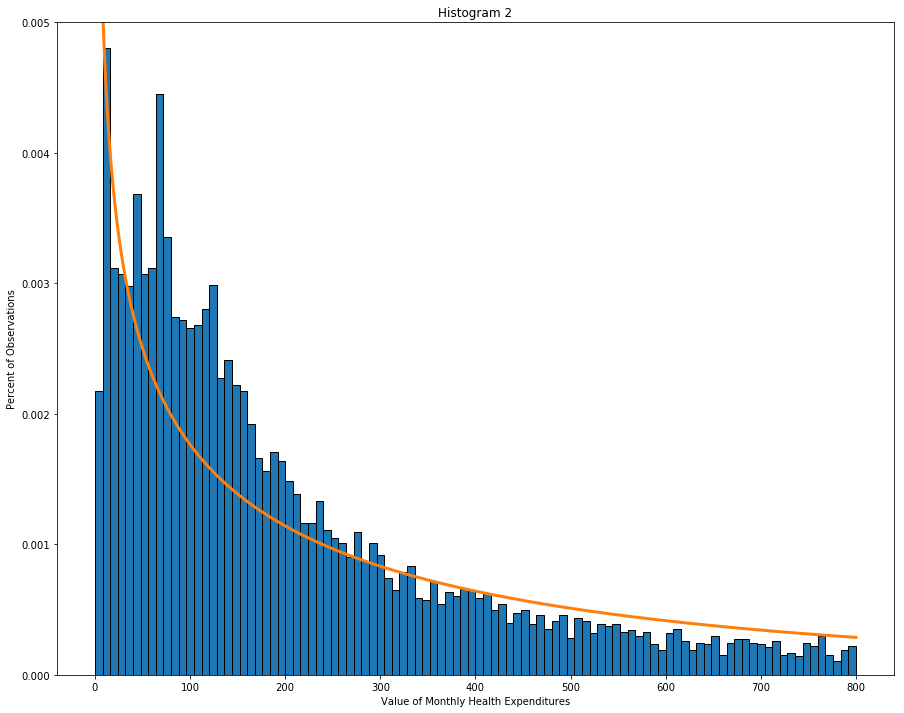

In [29]:
dist_pts = np.linspace(minimum, 800, 1000)
plt.subplots(figsize=(15, 12))
count, bins, ignored = plt.hist(data, 100, range=((minimum, 800)), weights=[1/(8*data.size)]*data.size, edgecolor='black')
plt.plot(dist_pts, GB2_pdf(dist_pts, a_MLE_GB2, b_MLE_GB2, p_MLE_GB2, q_MLE_GB2), lw=3)
plt.ylim((0, 0.005))
plt.ylabel('Percent of Observations')
plt.xlabel('Value of Monthly Health Expenditures')
plt.title('Histogram 2')
plt.show()

In [30]:
ll_GB2 = log_lik_GB2(data, a_MLE_GB2, b_MLE_GB2, p_MLE_GB2, q_MLE_GB2)
ll_GA = log_lik_GA(data, alpha_MLE_GA, beta_MLE_GA)
ll_GG = log_lik_GG(data, alpha_MLE_GG, beta_MLE_GG, m_MLE_GG)
LR_val_GA = 2 * abs(ll_GA - ll_GB2)
pval_GA = 1.0 - chi2.cdf(LR_val_GA, 4)
print('chi squared of GA with 4 degrees of freedom p-value = ', pval_GA)
LR_val_GG = 2 * abs(ll_GG - ll_GB2)
pval_GG = 1.0 - chi2.cdf(LR_val_GG, 4)
print('chi squared of GG with 4 degrees of freedom p-value = ', pval_GG)

chi squared of GA with 4 degrees of freedom p-value =  0.0
chi squared of GG with 4 degrees of freedom p-value =  0.0


In [31]:
likelihood_GB2 = 100 * quad(lambda x: GB2_pdf(np.array([x]), a_MLE_GB2, b_MLE_GB2, p_MLE_GB2, q_MLE_GB2), 1000, maximum)[0]
likelihood_GA = 100 * quad(lambda x: GA_pdf(np.array([x]), alpha_MLE_GA, beta_MLE_GA), 1000, maximum)[0]
print('Likelihood according to GB2: ', likelihood_GB2)
print('Likelihood according to GA: ', likelihood_GA)

Likelihood according to GB2:  16.273315767062794
Likelihood according to GA:  45.19626632588311
